# Modeling

## Decision Tree Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import acquire as aq

### Titanic Data Set

In [2]:
titanic_df = aq.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
cols_to_drop = ['passenger_id', 'deck', 'embarked', 'class']
titanic_df = titanic_df.drop(columns=cols_to_drop)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


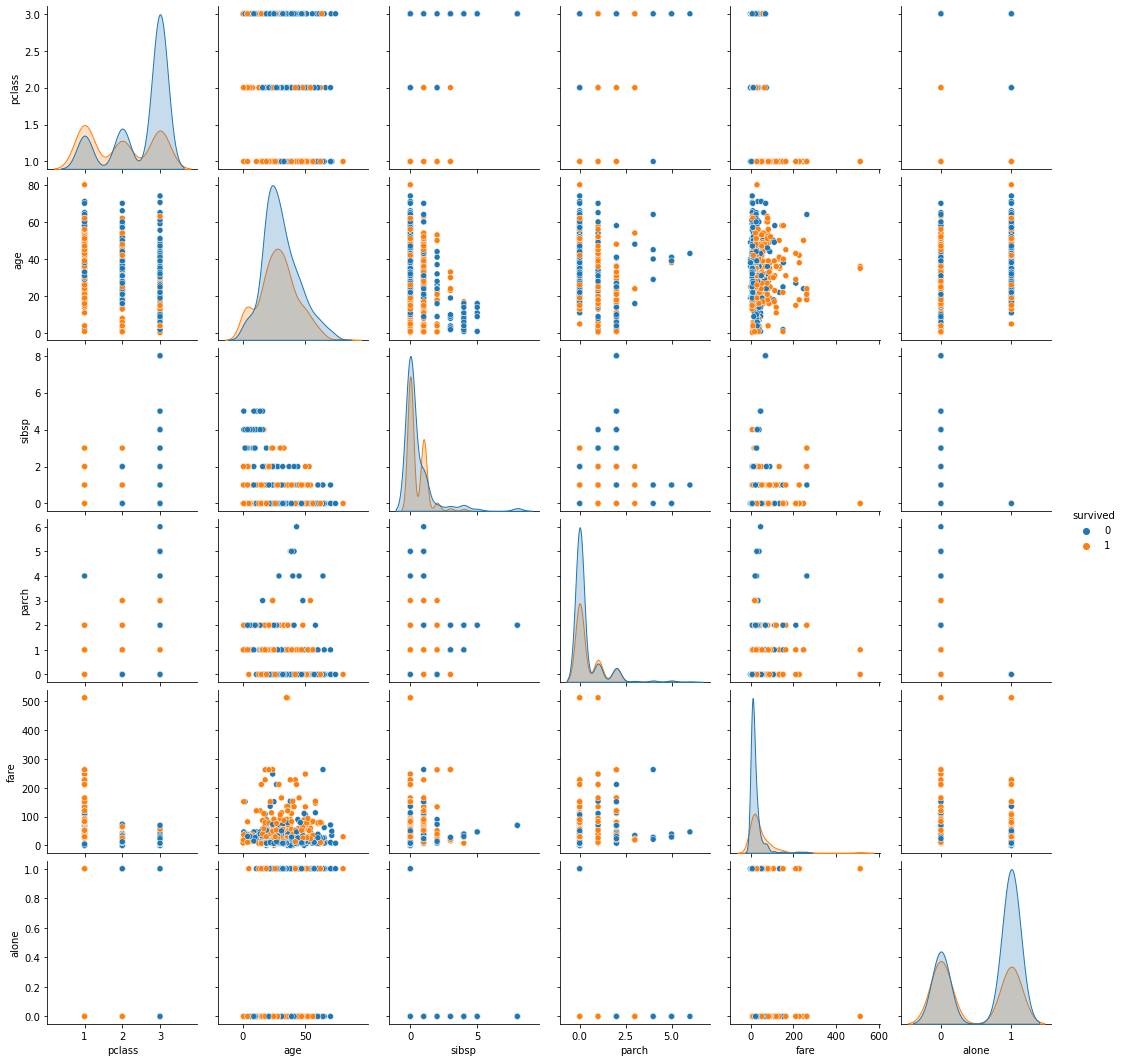

In [4]:
sns.pairplot(titanic_df, hue='survived')
plt.show()

In [5]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na=False)
dummy_df.head()

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [6]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,0,1,0,0,1


In [7]:
cols_to_drop = ['sex', 'embark_town']
titanic_df = titanic_df.drop(columns=cols_to_drop)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_female               891 non-null    uint8  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Cherbourg    891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 60.0 KB


In [9]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(titanic_df[['age']])
# imputer

In [10]:
titanic_age_mean = titanic_df.age.mean()
print(titanic_age_mean)
titanic_age_median = titanic_df.age.median()
print(titanic_age_median)

29.69911764705882
28.0


In [11]:
# Replacing age NaN with the mean age
titanic_age_median = titanic_df.age.median()
titanic_df.age = titanic_df.age.fillna(titanic_age_median)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_female               891 non-null    uint8  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Cherbourg    891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 60.0 KB


In [13]:
train, test = train_test_split(titanic_df, test_size=.2, random_state=123, stratify=titanic_df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 12)
validate -> (214, 12)
test -> (179, 12)


In [14]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [15]:
titanic_df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [16]:
549 / (549 + 342)

0.6161616161616161

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [17]:
# Create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [18]:
# Fit the model
clf = clf.fit(X_train, y_train)

In [19]:
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_tree', view=True)

'titanic_tree.pdf'

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [20]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [21]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [22]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

In [23]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [24]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [25]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,277,30
1,57,134


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



#### 5. Run through steps 2-4 using a different max_depth value.



In [27]:
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

In [28]:
clf = clf.fit(X_train, y_train)

In [29]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_tree', view=True)

'titanic_tree.pdf'

In [30]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [31]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [32]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.68644068, 0.31355932],
       [0.04255319, 0.95744681],
       [0.04255319, 0.95744681]])

In [33]:
confusion_matrix(y_train, y_pred)

array([[265,  42],
       [ 58, 133]])

In [34]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [35]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,265,42
1,58,133


In [36]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


#### 6. Which model performs better on your in-sample data?



##### 
- Depth of 14 with an accuracy of 0.99

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.76


In [38]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.795620,0.701299,0.761682,0.748460,0.759478
recall,0.825758,0.658537,0.761682,0.742147,0.761682
f1-score,0.810409,0.679245,0.761682,0.744827,0.760150
support,132.000000,82.000000,0.761682,214.000000,214.000000


##### 
- Depth of 13 has the best accuracy for validate: 0.81

#### Using a loop

In [52]:
# We can modify the above code to set a threshhold of difference
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
# And this will be a good example of a `break` statement in a loop

# Set our threshold for how overfit we'll tolerate
threshold = 0.10

models = []
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)   
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    # Calculate the difference
    difference = in_sample_accuracy - out_of_sample_accuracy
    
    # Add a conditional to check vs. the threshold
    if difference > threshold:
        break
    
    # Formulate the output for each model's performance on train and validate
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        "difference": difference
    }
    
    # Add the metrics dictionary to the list, so we can make a dataframe
    metrics.append(output)
    
    # Add the specific tree to a list of trained models
    models.append(tree)
    
df = pd.DataFrame(metrics)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.799197,0.761682,0.037515
1,3,0.825301,0.799065,0.026236
2,4,0.835341,0.794393,0.040949
3,5,0.853414,0.799065,0.054348
4,6,0.865462,0.789720,0.075742


## Random Forest

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [40]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [63]:
# This will be an attempt to build a Random Forest Loop 

# Set our threshold for how overfit we'll tolerate
def random_forest_loop(X_train, y_train, X_validate, y_validate):
    threshold = 0.2

    models = []
    metrics = []

    for i in range(2, 15):
        # Make the model
        rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=10, 
                                random_state=123)

        # Fit the model (on train and only train)
        rf = rf.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        in_sample_accuracy = rf.score(X_train, y_train)   
        out_of_sample_accuracy = rf.score(X_validate, y_validate)

        # Calculate the difference
        difference = in_sample_accuracy - out_of_sample_accuracy

        # Add a conditional to check vs. the threshold
        if difference > threshold:
            break

    # Formulate the output for each model's performance on train and validate
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy,
            "difference": difference
        }

    # Add the metrics dictionary to the list, so we can make a dataframe
        metrics.append(output)

    # Add the specific tree to a list of trained models
        models.append(rf)

    df = pd.DataFrame(metrics)
    return df

In [64]:
random_forest_loop(X_train, y_train, X_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.889558,0.799065,0.090493
1,3,0.889558,0.799065,0.090493
2,4,0.889558,0.799065,0.090493
3,5,0.889558,0.799065,0.090493
4,6,0.889558,0.799065,0.090493
5,7,0.889558,0.799065,0.090493
6,8,0.889558,0.799065,0.090493
7,9,0.889558,0.799065,0.090493
8,10,0.889558,0.799065,0.090493
9,11,0.889558,0.799065,0.090493


### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [43]:
y_pred = rf.predict(X_train)
print(confusion_matrix(y_train, y_pred))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



### 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?